```
L'idée :
Diagramme ombrothermique comparant la dernière année enregistrée avec la moyenne des x dernières années.
Pour ça y'a besoin des données journalières de la dernière année et des données mensuelles des dernières années.
```

```
Il vaut mieux que tu crée un tableau avec les valeurs de 2023 et les valeurs moyennes entre 2002 et 2023 plutot que de mixer les deux graphes a la fin
```

In [1]:
import pandas as pd
import os
import pandas as pd
import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')  # Activer l'extension pour afficher les graphiques
output_dir = 'output/'
os.makedirs(output_dir, exist_ok=True)

# Plot données 2023

In [ ]:
data = pd.read_csv(r"data\MENSQ_31_latest-2023-2024.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data.head()

In [4]:
data_2023 = data[data['AAAAMM'].astype(str).str.startswith('2023')]   # Filtrer les données pour l'année 2023
data_2023 = data_2023[['AAAAMM', 'RR', 'TM']]    # Sélectionner les colonnes d'intérêt
data_2023['Mois'] = data_2023['AAAAMM'].astype(str).str[4:6].astype(int)   # Extraire le mois
data_2023 = data_2023.sort_values(by='Mois')     # Trier les données par mois

In [ ]:
data_2023_auz = data_2023.loc[31035001]          # Filtrer les données pour l'AUZ 31035001
data_2023_auz['TM_2023'] = data_2023_auz['TM'] / 10 
data_2023_auz['RR_2023'] = data_2023_auz['RR'] / 10
data_2023_auz.set_index('Mois', inplace=True)     # Définir le mois comme index
data_2023_auz = data_2023_auz[['RR_2023', 'TM_2023']]       # Sélectionner les colonnes d'intérêt
data_2023_auz.to_json(output_dir + 'data_2023_auz.json', orient='table')  # Sauvegarder les données au format JSON
data_2023_auz

In [ ]:
barplot = data_2023_auz.hvplot.bar(
    x='Mois', y='RR', stacked=True, width=600, height=400, label='Pluviométrie (mm)', ylim=(0, data_2023_auz['RR'].max() + 5)
    )      # Créer un graphique en barres pour la pluviométrie
lineplot = data_2023_auz.hvplot.line(
    x='Mois', y='TM', color='red', line_width=2, label='Température moyenne (°C)', ylim=(0, (data_2023_auz['RR'].max() + 5)/2), yaxis='right'
    )      # Créer un graphique en ligne pour la température moyenne
plot = (barplot * lineplot).opts(
    multi_y=True, 
    title="Pluviométrie et Température moyenne (2023)", 
    xlabel='Mois', 
    ylabel='Valeurs', 
    legend_position='top_left'
    )      # Combiner les deux graphiques
plot

# Plot données 1950-2022

In [ ]:
data = pd.read_csv(r"data\MENSQ_31_previous-1950-2022.csv", sep=';', decimal=',', thousands='.', index_col=0)  # Lire le fichier CSV
data.head()

In [ ]:
data_auz = data.loc[31035001]
data_auz.index = pd.to_datetime(data_auz['AAAAMM'].astype(str), format='%Y%m')
data_1950_auz = data_auz[['RR', 'TM']]          # Filtrer les données pour l'AUZ 31035001
data_1950_auz['TM_mean'] = data_1950_auz['TM'] / 10 
data_1950_auz['RR_mean'] = data_1950_auz['RR'] / 10
data_1950_auz

In [ ]:
dt_after_2003 = data_1950_auz.loc['2003':]    # Filtrer les données à partir de 2003 
dt_after_2003

In [ ]:
mean_pre_2022 = dt_after_2003[['TM_mean','RR_mean']].groupby(dt_after_2003.index.month).mean()    # Calculer la moyenne mensuelle
mean_pre_2022.index.name = 'Mois'
mean_pre_2022.to_json(output_dir + 'mean_pre_2022.json', orient='table')    # Sauvegarder les données au format JSON
mean_pre_2022

In [ ]:
barplot = mean_pre_2022.hvplot.bar(
    x='Mois', y='RR', stacked=True, width=600, height=400, label='Pluviométrie moyenne entre 2003 et 2022 (mm)', 
    ylim=(0, mean_pre_2022['RR'].max() + 5), color='yellow'
    )      # Créer un graphique en barres pour la pluviométrie
lineplot = mean_pre_2022.hvplot.line(
    x='Mois', y='TM', color='green', line_width=2, label='Température moyenne entre 2003 et 2022 (mm) (°C)', 
    ylim=(0, (mean_pre_2022['RR'].max() + 5)/2), yaxis='right'
    )      # Créer un graphique en ligne pour la température moyenne
plot2 = (barplot * lineplot).opts(
    multi_y=True, 
    title="Pluviométrie et Température moyenne entre entre 2003 et 2022", 
    xlabel='Mois', 
    ylabel='Valeurs', 
    legend_position='top_left'
    )      # Combiner les deux graphiques
plot2

# Mix des deux tableaux

In [73]:
data_2023 = pd.read_json(r'output\data_2023_auz.json', orient='table')    # Lire les données de 2023
data_pre_2022 = pd.read_json(r'output\mean_pre_2022.json', orient='table')    # Lire les données de 2003 à 2022

In [85]:
table = data_2023.join(data_pre_2022)    # Joindre les deux jeux de données
table.index = pd.to_datetime(table.index, format='%m').month_name()    # Convertir l'index en noms de mois
table['Mois']=table.index
table

,RR_2023,TM_2023,TM_mean,RR_mean,Mois
Mois,,,,,
January,79.0,6.1,6.245,69.275000,January
February,18.0,6.9,7.195,41.650000,February
March,44.5,11.4,10.110,53.350000,March
April,58.5,13.3,13.065,61.025000,April
May,85.0,17.2,16.380,64.475000,May
June,121.0,22.0,20.805,58.350000,June
July,12.5,23.2,22.690,36.650000,July
August,28.5,24.2,22.605,38.078947,August
September,23.5,22.4,19.550,42.815789,September


In [58]:
table.to_csv(r'output/table_finale.csv')

## Barplot

In [89]:
import pandas as pd
import holoviews as hv
table_bar = table[['RR_mean','RR_2023','Mois']]
melted_table = table_bar.melt(id_vars='Mois', var_name='Type', value_name='Pluviométrie')

# Création des barres avec des catégories combinées
bars = hv.Bars(melted_table, kdims=['Mois', 'Type'], vdims='Pluviométrie').opts(
    xlabel='Mois',
    ylabel='Pluviométrie (mm)',
    color='Type',
    legend_position='top_left',
    width=900,
    height=400,
    tools=['hover'],
    title="Pluviométrie mensuelle (2023 vs Moyenne)",
    multi_level=False
)

bars

:Bars   [Mois,Type]   (Pluviométrie)

In [91]:
curves = hv.Curve(
    table, kdims=['Mois'], vdims=['TM_2023'], label='Température 2023'
).opts(
    line_width=2, color='blue'
) * hv.Curve(
    table, kdims=['Mois'], vdims=['TM_mean'], label='Température pré-2022'
).opts(
    line_width=2, color='red'
)

# Personnalisation du graphique
curves = curves.opts(
    title="Températures mensuelles (2023 vs Moyenne pré-2022)",
    xlabel="Mois",
    ylabel="Température (°C)",
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400
)

curves

:Overlay
   .Curve.Température_2023                  :Curve   [Mois]   (TM_2023)
   .Curve.Température_pré_hyphen_minus_2022 :Curve   [Mois]   (TM_mean)

In [ ]:
# Création des barres pour RR_2023 et RR_mean
melted_table = table.melt(id_vars='Mois', value_vars=['RR_2023', 'RR_mean'], 
                          var_name='Type', value_name='Pluviométrie')

bars = hv.Bars(melted_table, kdims=['Mois', 'Type'], vdims='Pluviométrie').opts(
    xlabel='Mois',
    ylabel='Pluviométrie (mm)',
    color='Type',
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400,
    alpha=0.7,  # Ajout de transparence pour distinguer les barres et les courbes
    muted_alpha=0.2,
    multi_level=False
)

# Création des courbes pour TM_2023 et TM_mean
curves = hv.Curve(
    table, kdims=['Mois'], vdims=['TM_2023'], label='Température 2023'
).opts(
    line_width=2, color='blue'
) * hv.Curve(
    table, kdims=['Mois'], vdims=['TM_mean'], label='Température pré-2022'
).opts(
    line_width=2, color='red'
)

# Superposition des barres et des courbes
combined = (bars * curves).opts(
    title="Pluviométrie et Température mensuelles (2023 vs Moyenne)",
    xlabel="Mois",
    ylabel="Valeurs",
    legend_position='top_left',
    tools=['hover'],
    width=900,
    height=400
)

combined

# Test avec mathplotlib

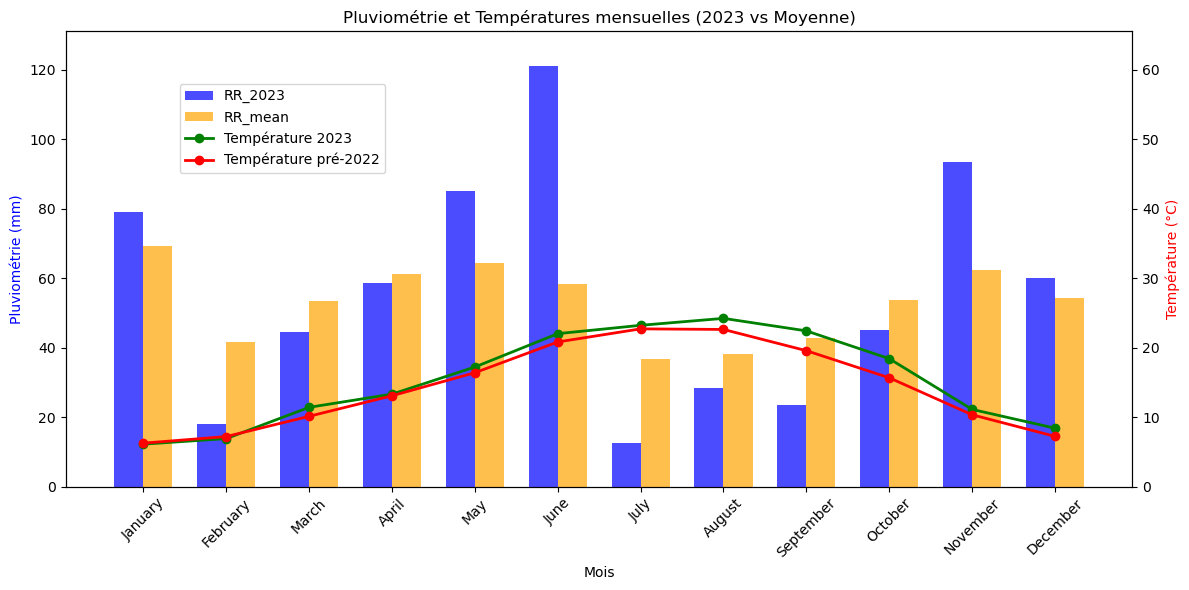

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import mplcursors

# Chargement du tableau CSV
table = pd.read_csv('output/table_finale.csv')

# Configuration de la figure
fig, ax1 = plt.subplots(figsize=(12, 6))

# Couleurs des barres et des courbes
bar_colors = ['blue', 'orange']
curve_colors = ['green', 'red']

# Barres pour RR_2023 et RR_mean
bar_width = 0.35
x = range(len(table['Mois']))

ax1.bar(
    [i - bar_width / 2 for i in x],
    table['RR_2023'],
    width=bar_width,
    label='RR_2023',
    color=bar_colors[0],
    alpha=0.7
)

ax1.bar(
    [i + bar_width / 2 for i in x],
    table['RR_mean'],
    width=bar_width,
    label='RR_mean',
    color=bar_colors[1],
    alpha=0.7
)

ax1.set_ylabel("Pluviométrie (mm)", color='blue')
ax1.set_xlabel("Mois")
ax1.set_xticks(x)
ax1.set_xticklabels(table['Mois'], rotation=45)

# Ajustement des limites pour l'axe des précipitations
precipitation_max = max(table['RR_2023'].max(), table['RR_mean'].max())
ax1.set_ylim(0, precipitation_max + 10)

# Courbes pour TM_2023 et TM_mean
ax2 = ax1.twinx()
ax2.plot(
    table['Mois'], 
    table['TM_2023'], 
    label='Température 2023', 
    color=curve_colors[0], 
    linewidth=2, 
    marker='o'
)
ax2.plot(
    table['Mois'], 
    table['TM_mean'], 
    label='Température pré-2022', 
    color=curve_colors[1], 
    linewidth=2, 
    marker='o'
)

# Ajustement des limites pour l'axe des températures (1/2 de l'axe des précipitations)
temperature_max = max(table['TM_2023'].max(), table['TM_mean'].max())
temperature_limit = (precipitation_max + 10) / 2  # Diviser par 2
scaling_factor = temperature_limit / temperature_max  # Facteur d'échelle

ax2.set_ylim(0, temperature_max * scaling_factor)
ax2.set_ylabel("Température (°C)", color='red')

# Ajout des légendes
fig.legend(loc="upper left", bbox_to_anchor=(0.1, 0.9), bbox_transform=ax1.transAxes)

# Activation des interactions avec mplcursors
cursor = mplcursors.cursor(highlight=True)
cursor.connect(
    "add", lambda sel: sel.annotation.set_text(
        f"{sel.artist.get_label()}\n{sel.target[0]}: {sel.target[1]:.2f}"
    )
)

# Titre et affichage
plt.title("Pluviométrie et Températures mensuelles (2023 vs Moyenne)")
plt.tight_layout()
plt.show()